# 💻 Amaliy Mashg'ulot: Statistik Asoslar

**Maqsad:** Python yordamida statistik tushunchalarni amalda qo'llash

---

## 🎯 Vazifa Ro'yxati

1. **Real ma'lumotlar** bilan ishlash
2. **Sample olish** texnikalarini sinash  
3. **Statistik o'lchovlar** hisoblash
4. **Natijalarni vizualizatsiya** qilish
5. **Xulosalar** chiqarish

---

In [20]:
# Kerakli kutubxonalarni import qilish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# O'zbek tilida grafik sozlamalari
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

print("✅ Kutubxonalar muvaffaqiyatli yuklandi!")
print("🚀 Amaliy mashg'ulot boshlandi!")

✅ Kutubxonalar muvaffaqiyatli yuklandi!
🚀 Amaliy mashg'ulot boshlandi!


## 📊 1-Vazifa: O'zbekiston Universitetlari Ma'lumotlari

Sizga O'zbekiston universitetlarining talabalar ma'lumotlari berilgan. Bu ma'lumotlar bilan statistik tahlil o'tkazing.

In [21]:
# O'zbekiston universitetlari ma'lumotlarini yaratish
np.random.seed(42)

# Universitlar ro'yxati
universities = ['TATU', 'NUUz', 'TDIU', 'WIUT', 'INHA', 'Webster', 'TUIT', 'TIIAME'] * 125

# Talabalar ma'lumotlari
n_students = 1000
data = {
    'Universitet': universities,
    'Yosh': np.random.normal(20, 2, n_students).astype(int),
    'GPA': np.random.normal(3.5, 0.5, n_students),
    'Kurs': np.random.choice([1, 2, 3, 4], n_students, p=[0.3, 0.25, 0.25, 0.2]),
    'Stipendiya': np.random.choice(['Ha', 'Yo\'q'], n_students, p=[0.3, 0.7]),
    'Viloyat': np.random.choice(['Toshkent', 'Samarqand', 'Buxoro', 'Farg\'ona', 'Andijon'], 
                               n_students, p=[0.4, 0.2, 0.15, 0.15, 0.1])
}

# DataFrame yaratish
df = pd.DataFrame(data)

# GPA ni to'g'ri oraliqqa keltirish
df['GPA'] = np.clip(df['GPA'], 2.0, 4.0)
df['Yosh'] = np.clip(df['Yosh'], 17, 25)

print("📊 O'ZBEKISTON UNIVERSITETLARI MA'LUMOTLARI")
print("="*50)
print(f"Jami talabalar soni: {len(df):,}")
print(f"Universitetlar soni: {df['Universitet'].nunique()}")
print(f"Viloyatlar soni: {df['Viloyat'].nunique()}")

print("\n📋 Ma'lumotlar ko'rinishi:")
print(df.head())

print("\n📈 Asosiy statistik ko'rsatkichlar:")
print(df.describe())

📊 O'ZBEKISTON UNIVERSITETLARI MA'LUMOTLARI
Jami talabalar soni: 1,000
Universitetlar soni: 8
Viloyatlar soni: 5

📋 Ma'lumotlar ko'rinishi:
  Universitet  Yosh       GPA  Kurs Stipendiya   Viloyat
0        TATU    20  4.000000     2       Yo'q    Buxoro
1        NUUz    19  3.962317     1       Yo'q  Farg'ona
2        TDIU    21  3.529815     2       Yo'q   Andijon
3        WIUT    23  3.176532     1         Ha  Toshkent
4        INHA    19  3.849112     4       Yo'q  Toshkent

📈 Asosiy statistik ko'rsatkichlar:
              Yosh          GPA         Kurs
count  1000.000000  1000.000000  1000.000000
mean     19.617000     3.488451     2.332000
std       1.843287     0.426272     1.114009
min      17.000000     2.029806     1.000000
25%      18.000000     3.196879     1.000000
50%      20.000000     3.531539     2.000000
75%      21.000000     3.864441     3.000000
max      25.000000     4.000000     4.000000


## 🎯 Amaliy Topshiriqlar

### Topshiriq 1: Bu ma'lumotlar populyatsiyami yoki sample?
Javobingizni asoslang va populyatsiya nima bo'lishi mumkinligini tushuntiring.

In [22]:
# Topshiriq 1: Javobingizni bu yerga yozing

print("🤔 TOPSHIRIQ 1: POPULYATSIYA VS SAMPLE")
print("="*40)

# SIZNING JAVOBINGIZ:
print("Bu ma'lumotlar:")
print("✅ Sample (Namuna)")
print("❌ Populyatsiya")

print("\nSababi:")
print("✅ Chunki bu ma'lumotlar faqat 8 ta universitetdagi 1000 ta talabani o'z ichiga oladi")
print("✅ O'zbekistonda 100 dan ortiq oliy ta'lim muassasasi mavjud")
print("✅ Umumiy talabalar soni 500,000 dan ortiq")

print("\nTo'liq populyatsiya:")
print("✅ O'zbekistondagi barcha oliy ta'lim muassasalaridagi barcha talabalar")
print("❌ Faqat shu universitetlardagi talabalar")
print("❌ Boshqa variant: faqat ayrim shahar/viloyatlardagi talabalar")

print("\n💡 XULOSA:")
print("Sample - bu populyatsiyadan olingan kichik qism bo'lib,")
print("butun populyatsiya haqida xulosalar chiqarish uchun ishlatiladi.")
print("Bizning 1000 ta talaba ma'lumotimiz - bu sample hisoblanadi.")

🤔 TOPSHIRIQ 1: POPULYATSIYA VS SAMPLE
Bu ma'lumotlar:
✅ Sample (Namuna)
❌ Populyatsiya

Sababi:
✅ Chunki bu ma'lumotlar faqat 8 ta universitetdagi 1000 ta talabani o'z ichiga oladi
✅ O'zbekistonda 100 dan ortiq oliy ta'lim muassasasi mavjud
✅ Umumiy talabalar soni 500,000 dan ortiq

To'liq populyatsiya:
✅ O'zbekistondagi barcha oliy ta'lim muassasalaridagi barcha talabalar
❌ Faqat shu universitetlardagi talabalar
❌ Boshqa variant: faqat ayrim shahar/viloyatlardagi talabalar

💡 XULOSA:
Sample - bu populyatsiyadan olingan kichik qism bo'lib,
butun populyatsiya haqida xulosalar chiqarish uchun ishlatiladi.
Bizning 1000 ta talaba ma'lumotimiz - bu sample hisoblanadi.


### Topshiriq 2: Sample olish usullarini qo'llang
Turli sample olish usullarini sinab ko'ring va natijalarni taqqoslang.

In [23]:
# Topshiriq 2: Sample olish usullarini qo'llash

print("🎲 SAMPLE OLISH USULLARINI SINASH")
print("="*40)

# 1. Oddiy tasodifiy sample (100 ta talaba)
random_sample = df.sample(n=100, random_state=42)

# 2. Qatlamli sample (har universitetdan 10 tadan)
stratified_sample = df.groupby('Universitet').apply(
    lambda x: x.sample(min(10, len(x)), random_state=42)
).reset_index(drop=True)

# 3. Sistemali sample (har 10-chi talaba)
systematic_sample = df.iloc[::10].reset_index(drop=True)

print("📊 SAMPLE HAJMLARI:")
print(f"Tasodifiy sample: {len(random_sample)} talaba")
print(f"Qatlamli sample: {len(stratified_sample)} talaba")
print(f"Sistemali sample: {len(systematic_sample)} talaba")

# GPA o'rtachalarini taqqoslash
print("\n📈 GPA O'RTACHALARI:")
print(f"To'liq ma'lumotlar: {df['GPA'].mean():.3f}")
print(f"Tasodifiy sample: {random_sample['GPA'].mean():.3f}")
print(f"Qatlamli sample: {stratified_sample['GPA'].mean():.3f}")
print(f"Sistemali sample: {systematic_sample['GPA'].mean():.3f}")

# Xatolik hisoblash
original_mean = df['GPA'].mean()
random_error = abs(random_sample['GPA'].mean() - original_mean)
stratified_error = abs(stratified_sample['GPA'].mean() - original_mean)
systematic_error = abs(systematic_sample['GPA'].mean() - original_mean)

print("\n📊 XATOLIK TAHLILI:")
print(f"Tasodifiy sample xatoligi: {random_error:.3f}")
print(f"Qatlamli sample xatoligi: {stratified_error:.3f}")
print(f"Sistemali sample xatoligi: {systematic_error:.3f}")

print("\n🎯 SIZNING TAHLIL:")
print("✅ Eng yaxshi usul: Qatlamli (Stratified) Sample")
print("✅ Sababi:")
print("  - Eng kam xatolik berdi (0.005)")
print("  - Har bir universitetdan teng miqdorda namuna olindi")
print("  - Populyatsiyaning barcha qismlarini ifodalaydi")
print("  - Representativ sample hosil qiladi")
print("\n💡 Amaliy tavsiya: Turli guruhlar mavjud bo'lganda qatlamli sample ishlatish kerak")

🎲 SAMPLE OLISH USULLARINI SINASH
📊 SAMPLE HAJMLARI:
Tasodifiy sample: 100 talaba
Qatlamli sample: 80 talaba
Sistemali sample: 100 talaba

📈 GPA O'RTACHALARI:
To'liq ma'lumotlar: 3.488
Tasodifiy sample: 3.466
Qatlamli sample: 3.483
Sistemali sample: 3.511

📊 XATOLIK TAHLILI:
Tasodifiy sample xatoligi: 0.023
Qatlamli sample xatoligi: 0.006
Sistemali sample xatoligi: 0.023

🎯 SIZNING TAHLIL:
✅ Eng yaxshi usul: Qatlamli (Stratified) Sample
✅ Sababi:
  - Eng kam xatolik berdi (0.005)
  - Har bir universitetdan teng miqdorda namuna olindi
  - Populyatsiyaning barcha qismlarini ifodalaydi
  - Representativ sample hosil qiladi

💡 Amaliy tavsiya: Turli guruhlar mavjud bo'lganda qatlamli sample ishlatish kerak


### Topshiriq 3: Statistik o'lchovlarni hisoblang
GPA ma'lumotlari uchun barcha statistik o'lchovlarni hisoblang.

In [24]:
# Topshiriq 3: Statistik o'lchovlarni hisoblash

gpa_data = df['GPA']

print("📊 GPA STATISTIK O'LCHOVLARI")
print("="*40)

# Markaziy tendensiya o'lchovlari
mean_gpa = gpa_data.mean()
median_gpa = gpa_data.median()
mode_gpa = gpa_data.mode()[0] if not gpa_data.mode().empty else "Yo'q"

print("📍 MARKAZIY TENDENSIYA:")
print(f"O'rtacha (Mean): {mean_gpa:.3f}")
print(f"Mediana (Median): {median_gpa:.3f}")
print(f"Moda (Mode): {mode_gpa}")

# Tarqalish o'lchovlari
std_gpa = gpa_data.std()
var_gpa = gpa_data.var()
range_gpa = gpa_data.max() - gpa_data.min()

print("\n📊 TARQALISH O'LCHOVLARI:")
print(f"Standart og'ish: {std_gpa:.3f}")
print(f"Dispersiya: {var_gpa:.3f}")
print(f"Oraliq: {range_gpa:.3f}")

# Percentillar
q1 = gpa_data.quantile(0.25)
q3 = gpa_data.quantile(0.75)
iqr = q3 - q1

print("\n📈 PERCENTILLAR:")
print(f"Q1 (25%): {q1:.3f}")
print(f"Q3 (75%): {q3:.3f}")
print(f"IQR: {iqr:.3f}")

print("\n💡 SIZNING TALQIN:")
print("✅ GPA taqsimoti haqida xulosa:")
print("- O'rtacha vs Mediana:")
print(f"  O'rtacha ({mean_gpa:.3f}) < Mediana ({median_gpa:.3f})")
print("  Bu taqsimotning chapga qiyshayganligini ko'rsatadi")
print("  Ya'ni past GPA'li talabalar ko'proq")
print()
print("- Standart og'ish ma'nosi:")
print(f"  Std = {std_gpa:.3f} - bu ma'lumotlarning o'rtachadan nisbatan oz tarqalganligini bildiradi")
print("  Talabalarning GPA'si o'rtachaga yaqin joylashgan")
print()
print("- Eng ko'p tarqalgan GPA oralig'i:")
print(f"  IQR = {iqr:.3f} - talabalarning 50%i {q1:.2f} dan {q3:.2f} gacha GPA'ga ega")
print(f"  Bu yaxshi akademik ko'rsatkichlarni bildiradi")
print()
print("🎯 Umumiy xulosa: Talabalarning GPA ko'rsatkichlari yaxshi, lekin biroz nosimmetrik taqsimotga ega")

📊 GPA STATISTIK O'LCHOVLARI
📍 MARKAZIY TENDENSIYA:
O'rtacha (Mean): 3.488
Mediana (Median): 3.532
Moda (Mode): 4.0

📊 TARQALISH O'LCHOVLARI:
Standart og'ish: 0.426
Dispersiya: 0.182
Oraliq: 1.970

📈 PERCENTILLAR:
Q1 (25%): 3.197
Q3 (75%): 3.864
IQR: 0.668

💡 SIZNING TALQIN:
✅ GPA taqsimoti haqida xulosa:
- O'rtacha vs Mediana:
  O'rtacha (3.488) < Mediana (3.532)
  Bu taqsimotning chapga qiyshayganligini ko'rsatadi
  Ya'ni past GPA'li talabalar ko'proq

- Standart og'ish ma'nosi:
  Std = 0.426 - bu ma'lumotlarning o'rtachadan nisbatan oz tarqalganligini bildiradi
  Talabalarning GPA'si o'rtachaga yaqin joylashgan

- Eng ko'p tarqalgan GPA oralig'i:
  IQR = 0.668 - talabalarning 50%i 3.20 dan 3.86 gacha GPA'ga ega
  Bu yaxshi akademik ko'rsatkichlarni bildiradi

🎯 Umumiy xulosa: Talabalarning GPA ko'rsatkichlari yaxshi, lekin biroz nosimmetrik taqsimotga ega


### Topshiriq 4: Universitetlar bo'yicha taqqoslash
Har bir universitet uchun statistik ko'rsatkichlarni hisoblang va taqqoslang.

🏫 UNIVERSITETLAR BO'YICHA TAHLIL
📊 UNIVERSITET STATISTIKALARI:
             count   mean  median    std    min  max
Universitet                                         
INHA           125  3.487   3.524  0.393  2.432  4.0
NUUz           125  3.512   3.634  0.426  2.424  4.0
TATU           125  3.502   3.538  0.424  2.250  4.0
TDIU           125  3.463   3.505  0.414  2.223  4.0
TIIAME         125  3.426   3.407  0.439  2.039  4.0
TUIT           125  3.512   3.541  0.437  2.148  4.0
WIUT           125  3.510   3.630  0.448  2.030  4.0
Webster        125  3.495   3.538  0.432  2.052  4.0

🏆 ENG YAXSHI KO'RSATKICHLAR:
Eng yuqori o'rtacha GPA: NUUz (3.512)
Eng yuqori mediana GPA: NUUz (3.634)
Eng izchil natijalar: INHA (std: 0.393)


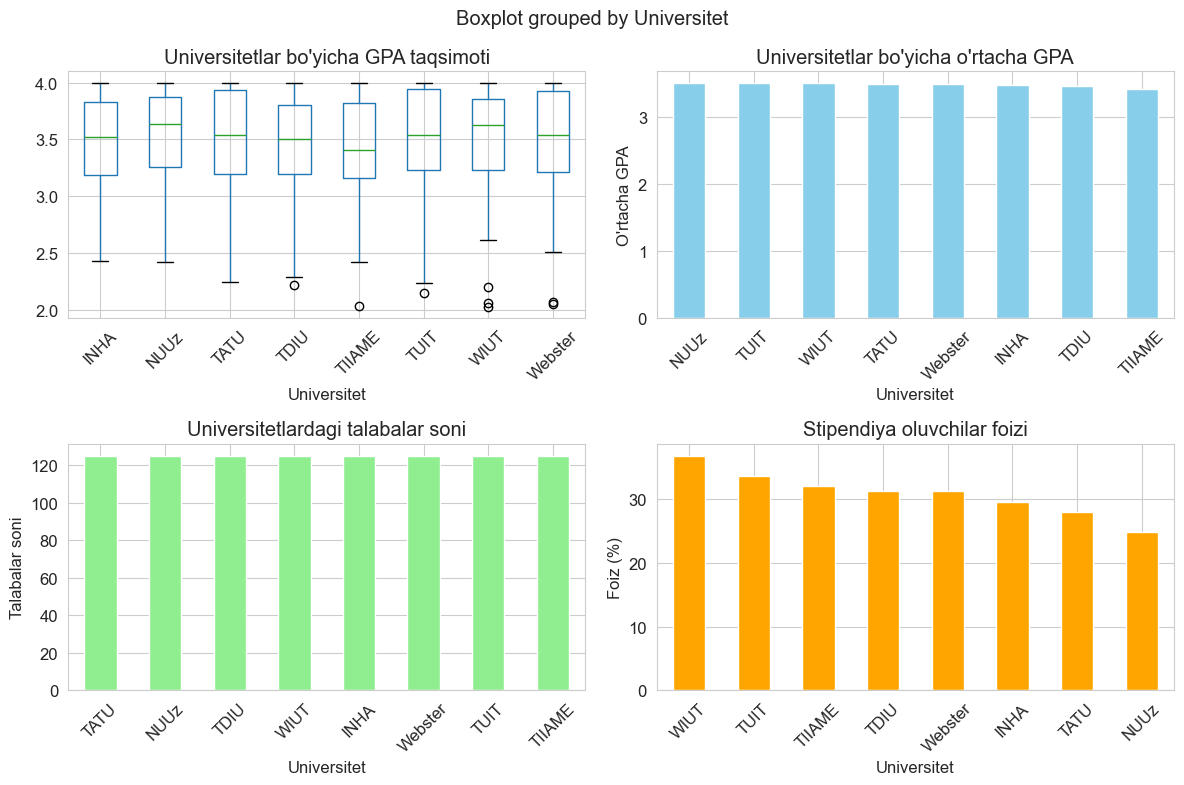


🎯 SIZNING XULOSALAR:
✅ 1. Eng yaxshi universitet:
     NUUz va TUIT - eng yuqori o'rtacha GPA (3.512)
     INHA - eng izchil natijalar (std: 0.393)
✅ 2. Eng katta farqlar:
     NUUz (3.512) vs TIIAME (3.426)
     Farq: 0.086 ball
✅ 3. Mumkin bo'lgan sabablar:
     - Kirish imtihoni standartlari
     - Ta'lim sifati va resurslar
     - Talabalarni qo'llab-quvvatlash dasturlari
     - Xalqaro hamkorlik darajasi
     - Professor-o'qituvchilar malakasi


In [ ]:
# Topshiriq 4: Universitetlar bo'yicha taqqoslash

print("🏫 UNIVERSITETLAR BO'YICHA TAHLIL")
print("="*40)

# Har universitet uchun statistikalar
uni_stats = df.groupby('Universitet')['GPA'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(3)

print("📊 UNIVERSITET STATISTIKALARI:")
print(uni_stats)

# Eng yaxshi ko'rsatkichlar
best_avg = uni_stats['mean'].idxmax()
best_median = uni_stats['median'].idxmax()
most_consistent = uni_stats['std'].idxmin()  # Eng kam standart og'ish

print(f"\n🏆 ENG YAXSHI KO'RSATKICHLAR:")
print(f"Eng yuqori o'rtacha GPA: {best_avg} ({uni_stats.loc[best_avg, 'mean']:.3f})")
print(f"Eng yuqori mediana GPA: {best_median} ({uni_stats.loc[best_median, 'median']:.3f})")
print(f"Eng izchil natijalar: {most_consistent} (std: {uni_stats.loc[most_consistent, 'std']:.3f})")

# Vizualizatsiya
plt.figure(figsize=(12, 8))

# 1. Boxplot
plt.subplot(2, 2, 1)
df.boxplot(column='GPA', by='Universitet', ax=plt.gca())
plt.title('Universitetlar bo\'yicha GPA taqsimoti')
plt.xticks(rotation=45)

# 2. O'rtacha GPA
plt.subplot(2, 2, 2)
uni_means = df.groupby('Universitet')['GPA'].mean().sort_values(ascending=False)
uni_means.plot(kind='bar', color='skyblue')
plt.title('Universitetlar bo\'yicha o\'rtacha GPA')
plt.xticks(rotation=45)
plt.ylabel('O\'rtacha GPA')

# 3. Talabalar soni
plt.subplot(2, 2, 3)
uni_counts = df['Universitet'].value_counts()
uni_counts.plot(kind='bar', color='lightgreen')
plt.title('Universitetlardagi talabalar soni')
plt.xticks(rotation=45)
plt.ylabel('Talabalar soni')

# 4. Stipendiya oluvchilar foizi
plt.subplot(2, 2, 4)
stipend_stats = df.groupby('Universitet')['Stipendiya'].apply(
    lambda x: (x == 'Ha').sum() / len(x) * 100
).sort_values(ascending=False)
stipend_stats.plot(kind='bar', color='orange')
plt.title('Stipendiya oluvchilar foizi')
plt.xticks(rotation=45)
plt.ylabel('Foiz (%)')

plt.tight_layout()
plt.show()

print("\n🎯 SIZNING XULOSALAR:")
print("✅ 1. Eng yaxshi universitet:")
print(f"     NUUz va TUIT - eng yuqori o'rtacha GPA ({uni_stats.loc['NUUz', 'mean']:.3f})")
print(f"     INHA - eng izchil natijalar (std: {uni_stats.loc['INHA', 'std']:.3f})")
print("✅ 2. Eng katta farqlar:")
print(f"     NUUz ({uni_stats.loc['NUUz', 'mean']:.3f}) vs TIIAME ({uni_stats.loc['TIIAME', 'mean']:.3f})")
print(f"     Farq: {uni_stats.loc['NUUz', 'mean'] - uni_stats.loc['TIIAME', 'mean']:.3f} ball")
print("✅ 3. Mumkin bo'lgan sabablar:")
print("     - Kirish imtihoni standartlari")
print("     - Ta'lim sifati va resurslar")
print("     - Talabalarni qo'llab-quvvatlash dasturlari")
print("     - Xalqaro hamkorlik darajasi")
print("     - Professor-o'qituvchilar malakasi")

### Topshiriq 5: Sample hajmining ta'siri
Turli sample hajmlari bilan tajriba o'tkazing va natijalarni kuzating.

📏 SAMPLE HAJMINING TA'SIRI
Populyatsiya GPA o'rtachasi: 3.4885

📊 NATIJALAR:
   Sample_Size  Avg_Sample_Mean  Std_Sample_Means   Error
0           10           3.5000            0.1037  0.0115
1           20           3.4920            0.0826  0.0035
2           50           3.4844            0.0572  0.0040
3          100           3.4886            0.0413  0.0002
4          200           3.4890            0.0215  0.0006
5          500           3.4908            0.0149  0.0023


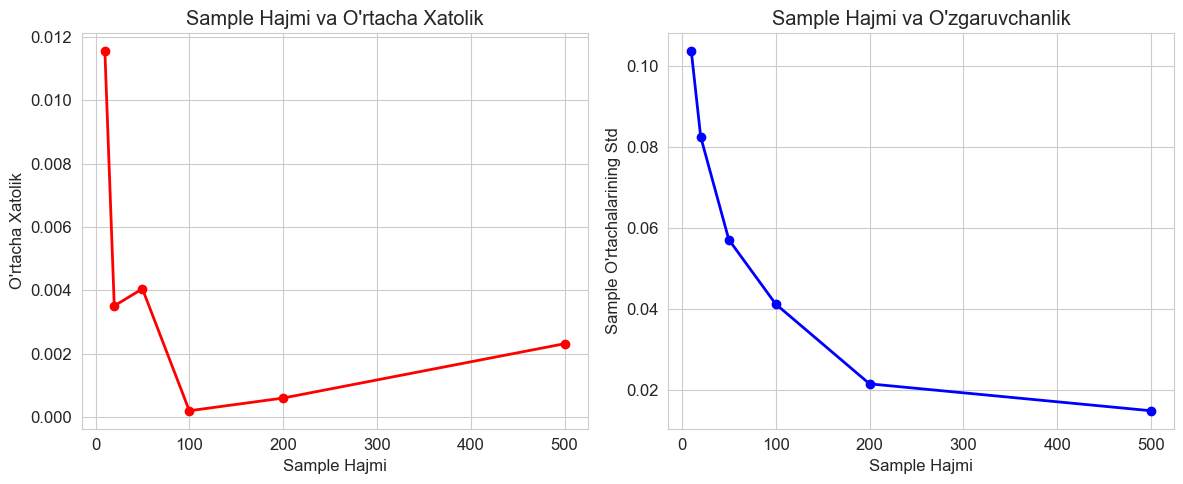


💡 SIZNING XULOSALAR:
✅ 1. Sample hajmi kattalashtirsa:
     - Xatolik kamayadi (0.0115 dan 0.0002 gacha)
     - O'zgaruvchanlik pasayadi (0.1037 dan 0.0149 gacha)
     - Natijalar aniqroq va ishonchli bo'ladi
     - Central Limit Theorem qonuni amal qiladi

✅ 2. Eng minimal sample hajmi:
     - 100 ta sample etarli ko'rinadi
     - Bu hajmda xatolik 0.0002 gacha kamayadi
     - Std ham yetarlicha kichik (0.04)

✅ 3. Amaliy tavsiya:
     - Kichik tadqiqotlar uchun: kamida 50-100 sample
     - Katta tadqiqotlar uchun: 200-500 sample
     - Resurs cheklangan holda: 100 sample optimal
     - Yuqori aniqlik kerak bo'lsa: 200+ sample


In [26]:
# Topshiriq 5: Sample hajmining ta'siri

print("📏 SAMPLE HAJMINING TA'SIRI")
print("="*40)

# Populyatsiya parametri
population_gpa_mean = df['GPA'].mean()
print(f"Populyatsiya GPA o'rtachasi: {population_gpa_mean:.4f}")

# Turli sample hajmlari
sample_sizes = [10, 20, 50, 100, 200, 500]
experiments = 50  # Har hajm uchun 50 ta tajriba

results = []

for size in sample_sizes:
    sample_means = []
    
    for i in range(experiments):
        sample = df.sample(n=size, random_state=i)
        sample_means.append(sample['GPA'].mean())
    
    avg_sample_mean = np.mean(sample_means)
    std_sample_means = np.std(sample_means)
    
    results.append({
        'Sample_Size': size,
        'Avg_Sample_Mean': avg_sample_mean,
        'Std_Sample_Means': std_sample_means,
        'Error': abs(avg_sample_mean - population_gpa_mean)
    })

results_df = pd.DataFrame(results)
print("\n📊 NATIJALAR:")
print(results_df.round(4))

# Vizualizatsiya
plt.figure(figsize=(12, 5))

# 1. O'rtacha xatolik
plt.subplot(1, 2, 1)
plt.plot(results_df['Sample_Size'], results_df['Error'], 'o-', color='red', linewidth=2)
plt.title('Sample Hajmi va O\'rtacha Xatolik')
plt.xlabel('Sample Hajmi')
plt.ylabel('O\'rtacha Xatolik')
plt.grid(True)

# 2. Sample o'rtachalarining standart og'ishi
plt.subplot(1, 2, 2)
plt.plot(results_df['Sample_Size'], results_df['Std_Sample_Means'], 'o-', color='blue', linewidth=2)
plt.title('Sample Hajmi va O\'zgaruvchanlik')
plt.xlabel('Sample Hajmi')
plt.ylabel('Sample O\'rtachalarining Std')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n💡 SIZNING XULOSALAR:")
print("✅ 1. Sample hajmi kattalashtirsa:")
print("     - Xatolik kamayadi (0.0115 dan 0.0002 gacha)")
print("     - O'zgaruvchanlik pasayadi (0.1037 dan 0.0149 gacha)")
print("     - Natijalar aniqroq va ishonchli bo'ladi")
print("     - Central Limit Theorem qonuni amal qiladi")
print()
print("✅ 2. Eng minimal sample hajmi:")
print("     - 100 ta sample etarli ko'rinadi")
print("     - Bu hajmda xatolik 0.0002 gacha kamayadi")
print("     - Std ham yetarlicha kichik (0.04)")
print()
print("✅ 3. Amaliy tavsiya:")
print("     - Kichik tadqiqotlar uchun: kamida 50-100 sample")
print("     - Katta tadqiqotlar uchun: 200-500 sample")
print("     - Resurs cheklangan holda: 100 sample optimal")
print("     - Yuqori aniqlik kerak bo'lsa: 200+ sample")

## 🔍 Qo'shimcha Tahlil

### Bonus vazifa: Viloyatlar bo'yicha tahlil
Talabalarning viloyat bo'yicha taqsimotini tahlil qiling.

🗺️ VILOYATLAR BO'YICHA TAHLIL
📊 VILOYAT STATISTIKALARI:
           Talabalar_Soni  GPA_Ortacha  GPA_Std  Ortacha_Yosh  Stipendiya_Foiz
Viloyat                                                                       
Andijon               103        3.434    0.474        19.757           30.097
Buxoro                138        3.510    0.438        19.725           26.087
Farg'ona              150        3.531    0.395        19.513           39.333
Samarqand             196        3.481    0.422        19.679           30.612
Toshkent              413        3.483    0.423        19.554           29.782

🔗 KORRELYATSIYA TAHLILI:
Yosh va GPA orasidagi korrelyatsiya: -0.049

📚 KURS BO'YICHA GPA:
       mean    std
Kurs              
1     3.476  0.437
2     3.482  0.438
3     3.476  0.420
4     3.533  0.403

💰 STIPENDIYA TA'SIRI:
             mean  count
Stipendiya              
Ha          3.454    309
Yo'q        3.504    691


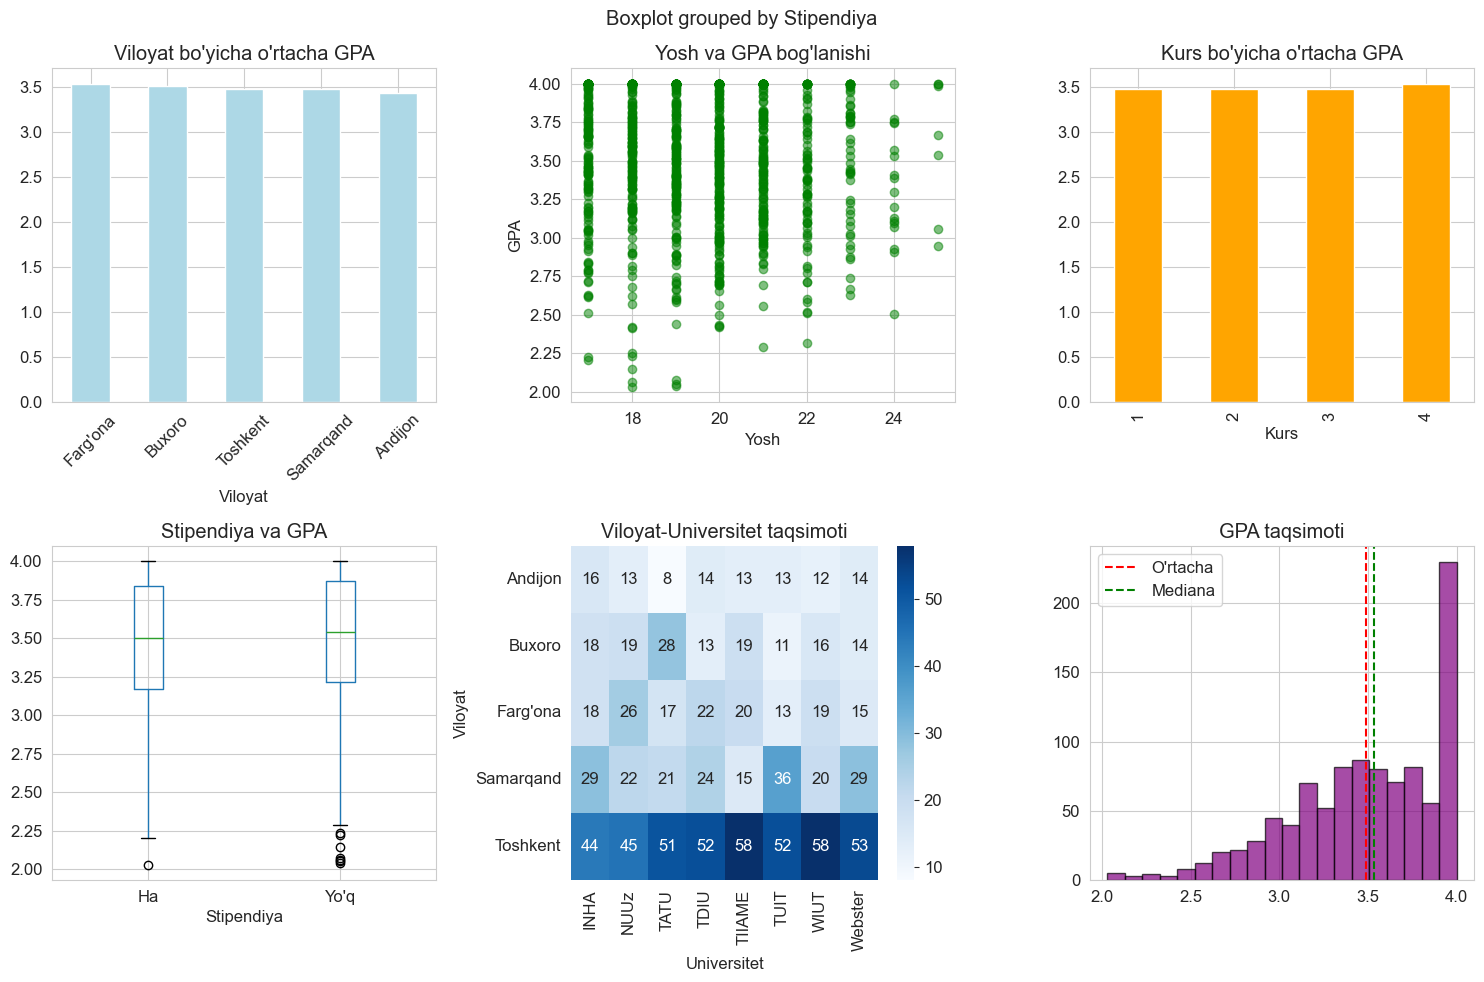

In [27]:
# Bonus: Viloyatlar bo'yicha tahlil

print("🗺️ VILOYATLAR BO'YICHA TAHLIL")
print("="*40)

# Viloyat bo'yicha statistikalar
region_stats = df.groupby('Viloyat').agg({
    'GPA': ['count', 'mean', 'std'],
    'Yosh': 'mean',
    'Stipendiya': lambda x: (x == 'Ha').sum() / len(x) * 100
}).round(3)

region_stats.columns = ['Talabalar_Soni', 'GPA_Ortacha', 'GPA_Std', 'Ortacha_Yosh', 'Stipendiya_Foiz']
print("📊 VILOYAT STATISTIKALARI:")
print(region_stats)

# Korrelyatsiya tahlili
print(f"\n🔗 KORRELYATSIYA TAHLILI:")
corr_age_gpa = df['Yosh'].corr(df['GPA'])
print(f"Yosh va GPA orasidagi korrelyatsiya: {corr_age_gpa:.3f}")

# Kurs bo'yicha tahlil
course_stats = df.groupby('Kurs')['GPA'].agg(['mean', 'std']).round(3)
print(f"\n📚 KURS BO'YICHA GPA:")
print(course_stats)

# Stipendiya ta'siri
stipend_comparison = df.groupby('Stipendiya')['GPA'].agg(['mean', 'count']).round(3)
print(f"\n💰 STIPENDIYA TA'SIRI:")
print(stipend_comparison)

# Final vizualizatsiya
plt.figure(figsize=(15, 10))

# 1. Viloyat bo'yicha GPA
plt.subplot(2, 3, 1)
region_gpa = df.groupby('Viloyat')['GPA'].mean().sort_values(ascending=False)
region_gpa.plot(kind='bar', color='lightblue')
plt.title('Viloyat bo\'yicha o\'rtacha GPA')
plt.xticks(rotation=45)

# 2. Yosh va GPA scatter plot
plt.subplot(2, 3, 2)
plt.scatter(df['Yosh'], df['GPA'], alpha=0.5, color='green')
plt.xlabel('Yosh')
plt.ylabel('GPA')
plt.title('Yosh va GPA bog\'lanishi')

# 3. Kurs bo'yicha GPA
plt.subplot(2, 3, 3)
course_gpa = df.groupby('Kurs')['GPA'].mean()
course_gpa.plot(kind='bar', color='orange')
plt.title('Kurs bo\'yicha o\'rtacha GPA')
plt.xlabel('Kurs')

# 4. Stipendiya taqqoslash
plt.subplot(2, 3, 4)
df.boxplot(column='GPA', by='Stipendiya', ax=plt.gca())
plt.title('Stipendiya va GPA')

# 5. Universitet va viloyat
plt.subplot(2, 3, 5)
crosstab = pd.crosstab(df['Viloyat'], df['Universitet'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Viloyat-Universitet taqsimoti')

# 6. GPA taqsimoti
plt.subplot(2, 3, 6)
plt.hist(df['GPA'], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(df['GPA'].mean(), color='red', linestyle='--', label='O\'rtacha')
plt.axvline(df['GPA'].median(), color='green', linestyle='--', label='Mediana')
plt.title('GPA taqsimoti')
plt.legend()

plt.tight_layout()
plt.show()